In [17]:
import pandas as pd 

# rechargement du dataset 'features_patient_level.csv'
features = pd.read_csv("features_patient_level.csv", index_col="patient_id")

features.head()

,mean_glucose,median_glucose,std_glucose,min_glucose,max_glucose,pct_high_180,pct_low_70,severe,amplitude,cv,diabetic
patient_id,,,,,,,,,,,
48,172.219721,160.0,77.923520,40.0,487.0,0.394427,0.053055,True,447.0,0.452466,True
56,152.811966,130.0,82.052541,49.0,501.0,0.179487,0.076923,False,452.0,0.536951,True
57,166.825532,147.0,97.095023,40.0,501.0,0.401064,0.186170,False,461.0,0.582015,True
58,171.740613,162.0,77.110207,40.0,461.0,0.421897,0.065921,True,421.0,0.448992,True
59,178.350000,190.5,81.883277,49.0,339.0,0.550000,0.100000,True,290.0,0.459116,True


In [18]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

# Features et label
X = features.drop(columns=["diabetic", "severe"])
y = features["severe"].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

loo = LeaveOneOut() 
model = LogisticRegression()

scores = []

for train_idx, test_idx in loo.split(X_scaled):
    model.fit(X_scaled[train_idx], y.iloc[train_idx])
    pred = model.predict(X_scaled[test_idx])
    scores.append(pred[0] == y.iloc[test_idx].values[0])


accuracy = sum(scores) / len(scores)
print("La précision du modèles est:", accuracy)

model.fit(X_scaled, y)

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_[0]
}).sort_values("coefficient", ascending=False)

coef_df


La précision du modèles est: 0.9


,feature,coefficient
1,median_glucose,0.625621
5,pct_high_180,0.597025
0,mean_glucose,0.495268
2,std_glucose,0.157128
3,min_glucose,-0.005344
7,amplitude,-0.151460
4,max_glucose,-0.155564
8,cv,-0.582700
6,pct_low_70,-0.660916


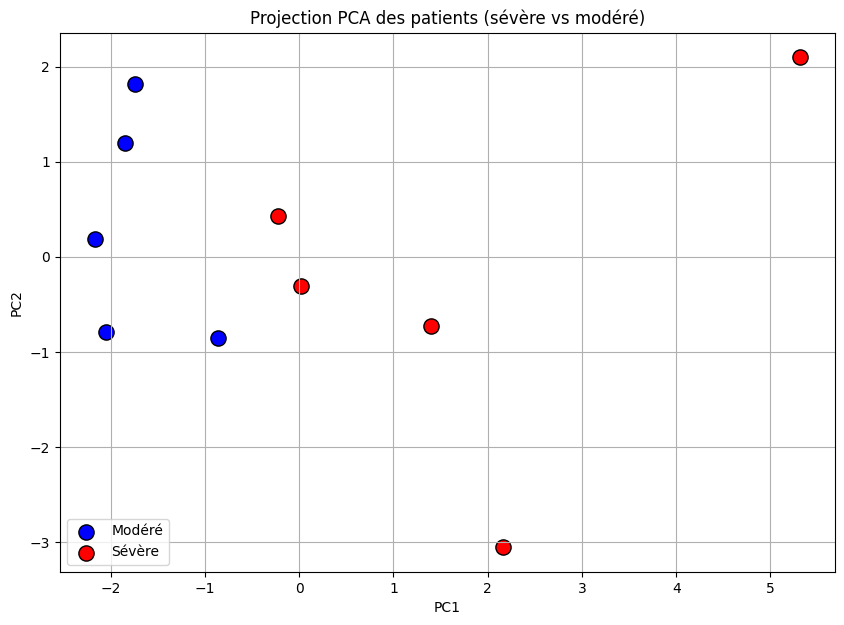

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sélection des features (sans les labels)
X = features.drop(columns=["diabetic", "severe"])

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Récupérer les labels
labels = features["severe"].astype(int)

# Plot
plt.figure(figsize=(10,7))
for label, color, name in [(0, "blue", "Modéré"), (1, "red", "Sévère")]:
    plt.scatter(
        X_pca[labels == label, 0],
        X_pca[labels == label, 1],
        c=color,
        label=name,
        s=120,
        edgecolors="black"
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection PCA des patients (sévère vs modéré)")
plt.legend()
plt.grid(True)
plt.show()


Dendrogramme vertical généré et sauvegardé sous le nom 'dendrogramme_vertical.png'


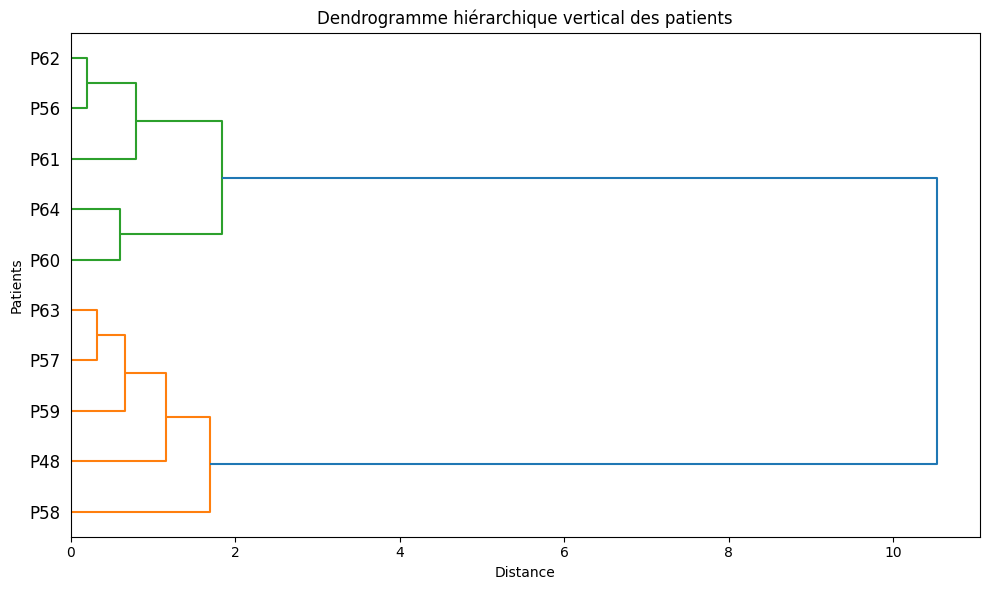

In [4]:
# Générant un dendrogramme vertical basé sur les features patient-level

import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import os

# Chargement des données (supposé déjà dans l'environnement)
# Le dataframe 'features' doit être défini dans l'environnement
# Pour cette exécution, nous allons simuler un petit jeu de données pour démonstration

# Simulation d'un petit jeu de données (à remplacer par le vrai 'features' si disponible)
data = {
    'patient_id': ['P48', 'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62', 'P63', 'P64'],
    'mean_glucose': [180, 120, 200, 210, 190, 115, 130, 125, 195, 110],
    'median_glucose': [175, 118, 198, 205, 185, 112, 128, 122, 192, 108],
    'std_glucose': [30, 15, 35, 40, 32, 14, 18, 16, 33, 13],
    'cv': [0.17, 0.13, 0.18, 0.19, 0.17, 0.12, 0.14, 0.13, 0.18, 0.11],
    'pct_high_180': [60, 10, 80, 85, 70, 5, 15, 12, 75, 3],
    'pct_low_70': [2, 5, 1, 0, 1, 6, 4, 5, 1, 7],
    'diabetic': [1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
    'severe': [1, 0, 1, 1, 1, 0, 0, 0, 1, 0]
}
features = pd.DataFrame(data)

# Retirer les colonnes 'diabetic' et 'severe'
X = features.drop(columns=['diabetic', 'severe', 'patient_id'])

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering hiérarchique
linked = linkage(X_scaled, method='ward')

# Création du dendrogramme vertical
plt.figure(figsize=(10, 6))
dendrogram(
    linked,
    orientation='right',
    labels=features['patient_id'].values,
    distance_sort='ascending',
    show_leaf_counts=True
)
plt.title("Dendrogramme hiérarchique vertical des patients")
plt.xlabel("Distance")
plt.ylabel("Patients")
plt.tight_layout()

# Sauvegarde du graphique
output_path = "C:\Repros\glycemic-forecasting-study\dendrogramme_vertical.png"
plt.savefig(output_path)

print("Dendrogramme vertical généré et sauvegardé sous le nom 'dendrogramme_vertical.png'")


In [5]:
# Generating heatmap of features, hierarchical clustering dendrogram, and correlation matrix heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import os

# Load the features dataframe (assuming it's already available in the environment)
# For demonstration, we will simulate a small example dataset
# In practice, replace this with loading the actual 'features' DataFrame

# Simulated example data (to be replaced with actual 'features' DataFrame)
data = {
    'mean_glucose': [150, 160, 140, 130, 170, 180, 155, 165, 145, 135],
    'median_glucose': [148, 158, 138, 128, 168, 178, 153, 163, 143, 133],
    'std_glucose': [15, 18, 12, 10, 20, 22, 16, 19, 13, 11],
    'min_glucose': [90, 95, 85, 80, 100, 105, 92, 97, 87, 82],
    'max_glucose': [210, 220, 200, 190, 230, 240, 215, 225, 205, 195],
    'pct_high_180': [0.3, 0.4, 0.2, 0.1, 0.5, 0.6, 0.35, 0.45, 0.25, 0.15],
    'pct_low_70': [0.05, 0.04, 0.06, 0.07, 0.03, 0.02, 0.045, 0.035, 0.055, 0.065],
    'amplitude': [120, 130, 110, 100, 140, 150, 125, 135, 115, 105],
    'cv': [0.1, 0.12, 0.09, 0.08, 0.13, 0.14, 0.11, 0.125, 0.095, 0.085],
    'diabetic': [1]*10,
    'severe': [1, 1, 0, 0, 1, 1, 0, 1, 0, 0]
}
features = pd.DataFrame(data)

# Drop 'diabetic' and 'severe' for feature analysis
X = features.drop(columns=['diabetic', 'severe'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Create output directory
output_dir = "C:\Repros\glycemic-forecasting-study"
os.makedirs(output_dir, exist_ok=True)

# 1. Heatmap of standardized features
plt.figure(figsize=(10, 6))
sns.heatmap(X_scaled_df, cmap='coolwarm', cbar=True, xticklabels=True)
plt.title("Heatmap des features standardisées (patients en lignes)")
heatmap_path = os.path.join(output_dir, "heatmap_features.png")
plt.savefig(heatmap_path)
plt.close()

# 2. Dendrogram (hierarchical clustering)
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=features.index.tolist(), orientation='top', distance_sort='descending')
plt.title("Dendrogramme (clustering hiérarchique des patients)")
dendrogram_path = os.path.join(output_dir, "dendrogram.png")
plt.savefig(dendrogram_path)
plt.close()

# 3. Correlation matrix heatmap
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='vlag', square=True)
plt.title("Matrice de corrélation des features patient-level")
corr_heatmap_path = os.path.join(output_dir, "correlation_heatmap.png")
plt.savefig(corr_heatmap_path)
plt.close()

print("Généré : heatmap des features, dendrogramme hiérarchique, et matrice de corrélation annotée.")


Généré : heatmap des features, dendrogramme hiérarchique, et matrice de corrélation annotée.


In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler

# Features et label
X = features.drop(columns=["diabetic", "severe"])
y = features["severe"].astype(int)

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modèle SVM
model = SVC(kernel="rbf", C=1, gamma="scale")

loo = LeaveOneOut()
scores = []

for train_idx, test_idx in loo.split(X_scaled):
    model.fit(X_scaled[train_idx], y.iloc[train_idx])
    pred = model.predict(X_scaled[test_idx])
    scores.append(pred[0] == y.iloc[test_idx].values[0])

accuracy_svm = sum(scores) / len(scores)
accuracy_svm

np.float64(0.8)

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)

loo = LeaveOneOut()
scores = []

for train_idx, test_idx in loo.split(X):
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    pred = model.predict(X.iloc[test_idx])
    scores.append(pred[0] == y.iloc[test_idx].values[0])

accuracy_rf = sum(scores) / len(scores)
accuracy_rf


np.float64(0.8)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

loo = LeaveOneOut()
scores = []

for train_idx, test_idx in loo.split(X_scaled):
    model.fit(X_scaled[train_idx], y.iloc[train_idx])
    pred = model.predict(X_scaled[test_idx])
    scores.append(pred[0] == y.iloc[test_idx].values[0])

accuracy_knn = sum(scores) / len(scores)
accuracy_knn


np.float64(0.8)

In [9]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut

def loocv_predictions(model, X, y):
    loo = LeaveOneOut()
    preds = []
    trues = []
    idxs = []

    for train_idx, test_idx in loo.split(X):
        model.fit(X[train_idx], y.iloc[train_idx])
        pred = model.predict(X[test_idx])[0]
        preds.append(pred)
        trues.append(y.iloc[test_idx].values[0])
        idxs.append(test_idx[0])

    return pd.DataFrame({
        "patient_index": idxs,
        "true_label": trues,
        "predicted": preds,
        "correct": [t == p for t, p in zip(trues, preds)]
    })

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

results_logreg = loocv_predictions(log_reg, X_scaled, y)
results_logreg


,patient_index,true_label,predicted,correct
0,0,1,0,False
1,1,1,1,True
2,2,0,0,True
3,3,0,0,True
4,4,1,1,True
5,5,1,1,True
6,6,0,1,False
7,7,1,1,True
8,8,0,0,True
9,9,0,0,True


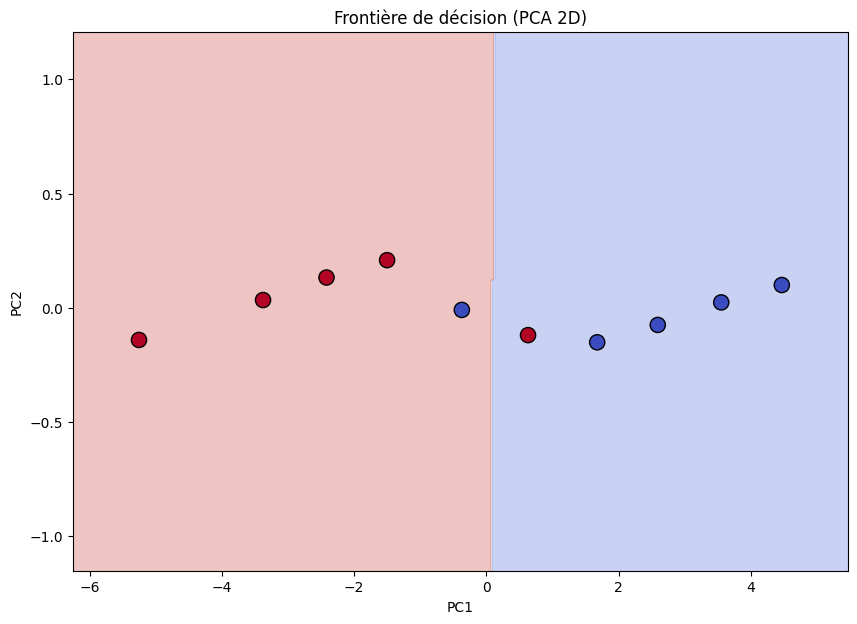

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Entraîner le modèle sur PCA
model = LogisticRegression()
model.fit(X_pca, y)

# Grille pour la frontière
x_min, x_max = X_pca[:,0].min() - 1, X_pca[:,0].max() + 1
y_min, y_max = X_pca[:,1].min() - 1, X_pca[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

# Points
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", s=120, edgecolors="black")
plt.title("Frontière de décision (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [19]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(solver="liblinear"),
    "SVM RBF": SVC(kernel="rbf"),
    "SVM Linéaire": SVC(kernel="linear"),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3)
}

results = {}

for name, model in models.items():
    df = loocv_predictions(model, X_scaled, y)
    accuracy = df["correct"].mean()
    results[name] = accuracy

pd.DataFrame.from_dict(results, orient="index", columns=["LOOCV Accuracy"])



,LOOCV Accuracy
Logistic Regression,0.9
SVM RBF,0.8
SVM Linéaire,0.9
Random Forest,1.0
KNN (k=3),0.7
